Берём непрервывное гамма-распределение вида erlang при a=10 (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.erlang.html)
Сгенерируем из него выборку объёма 1000, построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения случайной величины.

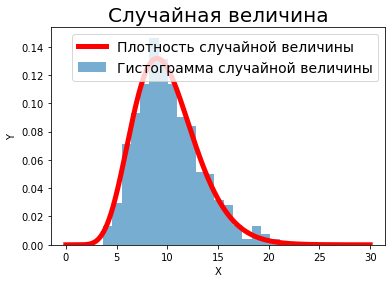

In [1]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
# генерируем выборку
sample = sps.erlang.rvs(10, size=1000)
# строим гистограмму выборки
plt.hist(sample, bins=20, density=True,
 alpha=0.6, label='Гистограмма случайной величины')
# сторим график плотности
grid = np.linspace(0, 30, 1000)
plt.plot(grid, sps.erlang.pdf(grid, 10), color='red',
 lw=5, label='Плотность случайной величины')
plt.title(r'Случайная величина', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

Опишем функцию, строящую гистограмму массива выборочных средних и график плотности соответствующего нормального распределения для объёма выборке равного n

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math

def draw_hists(n):
    # обозначим массив выборочных средних
    sample_means = np.array([])
    # цикл генерации случайных выборок количества n из функции
    for i in range (1,1000):
        sample = sps.erlang.rvs(10, size=n)
        mean = sum(sample)/n # определение выборочного среднего
        sample_means = np.append(sample_means, mean)

    # определим теоретическое среднее и дисперсию заданного распределения erlang
    theo_mean, theo_var = sps.erlang.stats(10, moments='mv')
    # получаем нормальное распределение с полученными параметрами и берём его плотность
    x = np.linspace(0, 20, 1000)
    pdf = sps.norm.pdf(x, loc=theo_mean, scale=math.sqrt(theo_var))
    # строим гистограмму массива средних при n=5 и плотность нормального распределения
    plt.plot(x, pdf, label='PDF(n=5)')
    plt.hist(sample, bins=20, density=True,
     alpha=0.6, label='Гистограмма массива выборочных средних')
    plt.ylabel('number of samples')
    plt.xlabel('$x$')
    plt.legend(loc='best')

Оценим распределение выборочного среднего при выборке объёма n=5

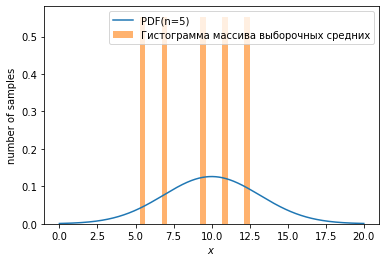

In [3]:
draw_hists(5)

Оценим распределение выборочного среднего при выборке объёма n=10

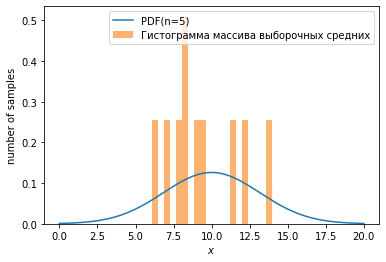

In [4]:
draw_hists(10)

Попробуем при n=50

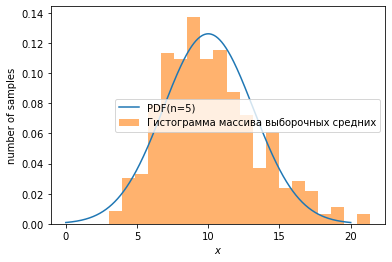

In [11]:
draw_hists(500)

Вывод:
При увеличении объёма выборок распределение выборочных средних становится всё ближе к нормальному, что наглядно демонстрирует нам действие ЦПТ.